In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d    
%matplotlib notebook

# Multiple Linear Regression

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \varepsilon$

In [2]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/olympics.csv'
df = pd.read_csv(data_url, sep=",")[:100]
df.dropna(subset = ["height", "weight", "age"], inplace=True)

Create data matrix

In [3]:
X_1 = df.height.values.reshape((len(df.height),1))
X_2 = df.weight.values.reshape((len(df.weight),1))
y = df.age.values.reshape((len(df.age),1))
ones = np.ones((len(X_1),1))
X_dat = np.concatenate((X_1, X_2), axis=1)
X = np.concatenate((ones, X_dat), axis=1)

<IPython.core.display.Javascript object>


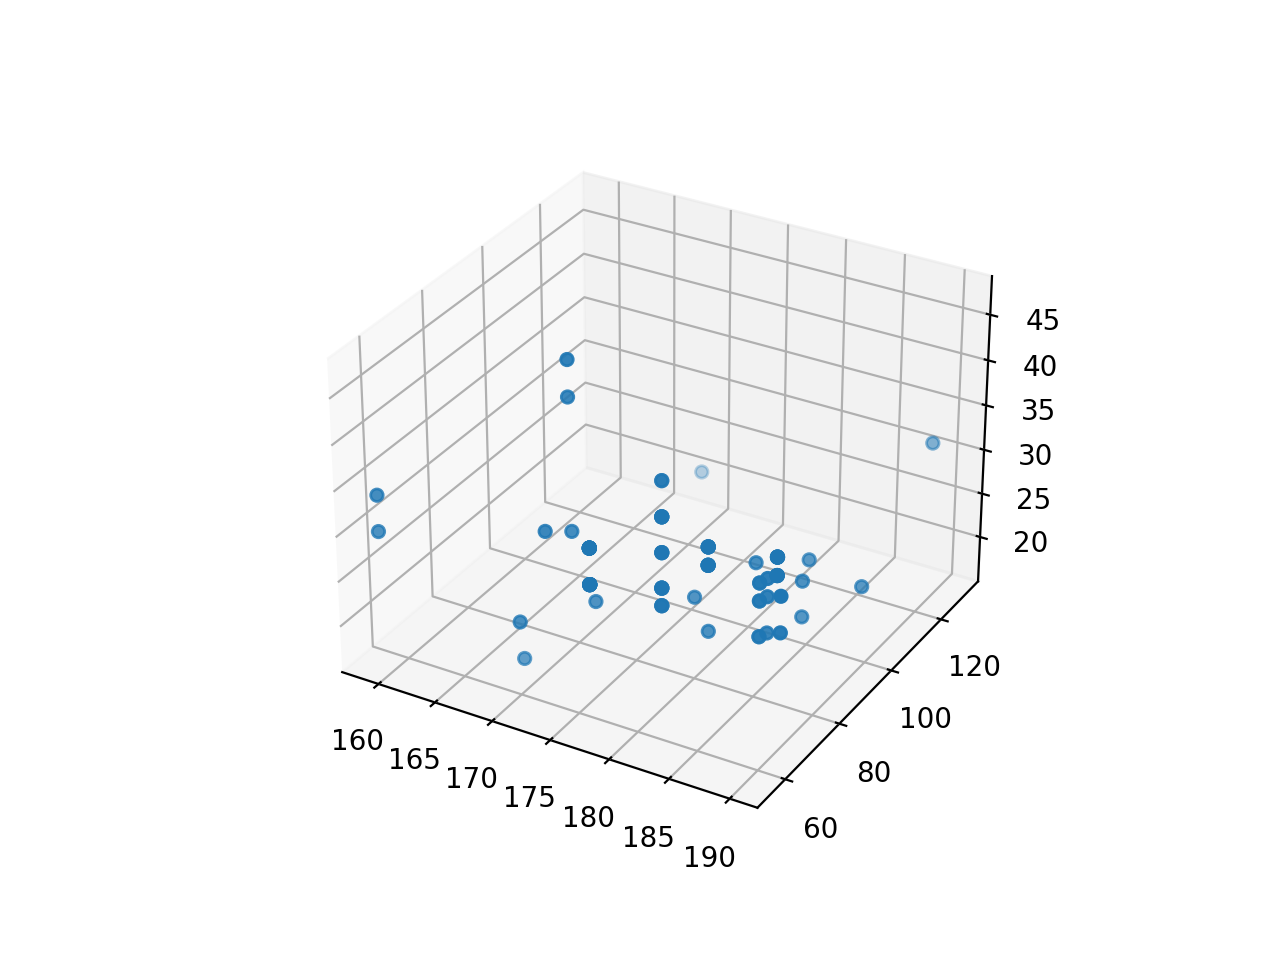

In [4]:
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], y)

Compute best set of weights

In [5]:
hat_β = np.linalg.inv((X.T @ X)) @ X.T @ y
hat_y = X @ hat_β

Create predictions in a grid format to plot in 3D.

In [6]:
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
grid = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = grid @ hat_β

<IPython.core.display.Javascript object>


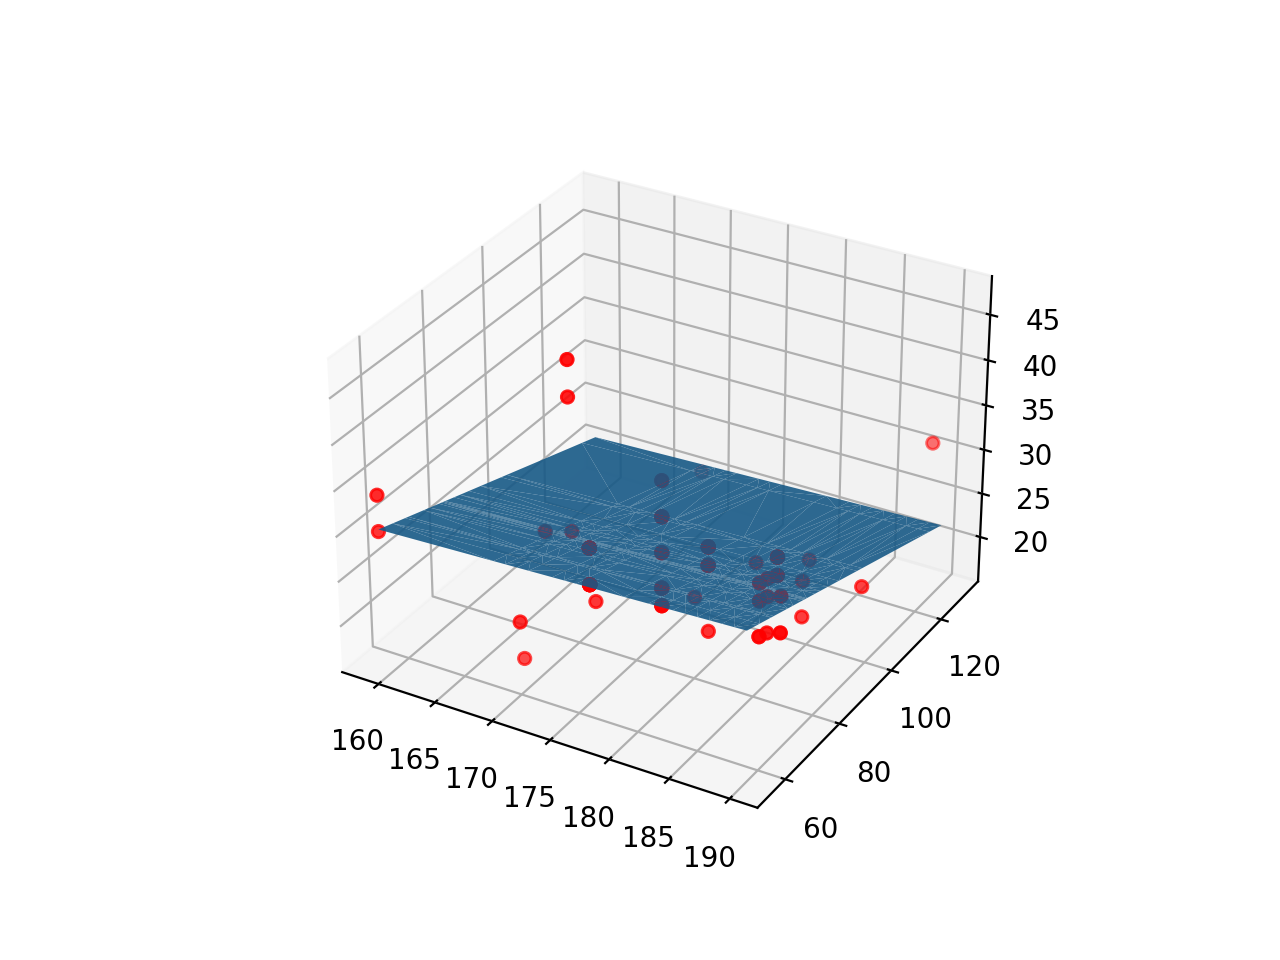

In [7]:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], y, color='r')
ax.plot_trisurf(grid[:, 1], grid[:, 2], Z.reshape((len(Z),)), alpha=0.9)
plt.show()

# Polynomial Multiple Linear Regression

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \varepsilon$

In [8]:
def create_phi_matrix(data, degrees):
    copy = data.copy()
    polynomials = np.ones((data.shape[0],1))
    for i in range(data.shape[1]):
        for j in range(2, degrees+1):
            polynomials = np.append(polynomials, (copy[:,i]**j).reshape((len(data),1)), axis=1)
            df = np.append(data.reshape((len(data),2)), polynomials[:,1:], axis=1)
    return df

In [33]:
polynomial_degree = 4
Φ_mat = create_phi_matrix(data=X_dat, degrees=polynomial_degree)
ones = np.ones((len(Φ_mat),1))
Φ = np.append(ones, Φ_mat, axis=1)

In [34]:
hat_β = np.linalg.inv((Φ.T @ Φ)) @ Φ.T @ y
hat_y = Φ @ hat_β
rmse = round(((sum((y - hat_y)**2))**(1/2))[0],2)

In [35]:
mn = np.min(X_dat, axis=0)
mx = np.max(X_dat, axis=0)
X_ax,Y_ax = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
XX = X_ax.flatten()
YY = Y_ax.flatten()

# use the same function to create the Φ matrix in the form that the 3D graph needs them.
X_flat = np.c_[XX,YY]
Φ_flat = create_phi_matrix(data=X_flat, degrees=polynomial_degree)
Z = ((np.c_[np.ones(XX.shape), Φ_flat]) @ hat_β).reshape(X_ax.shape)

<IPython.core.display.Javascript object>


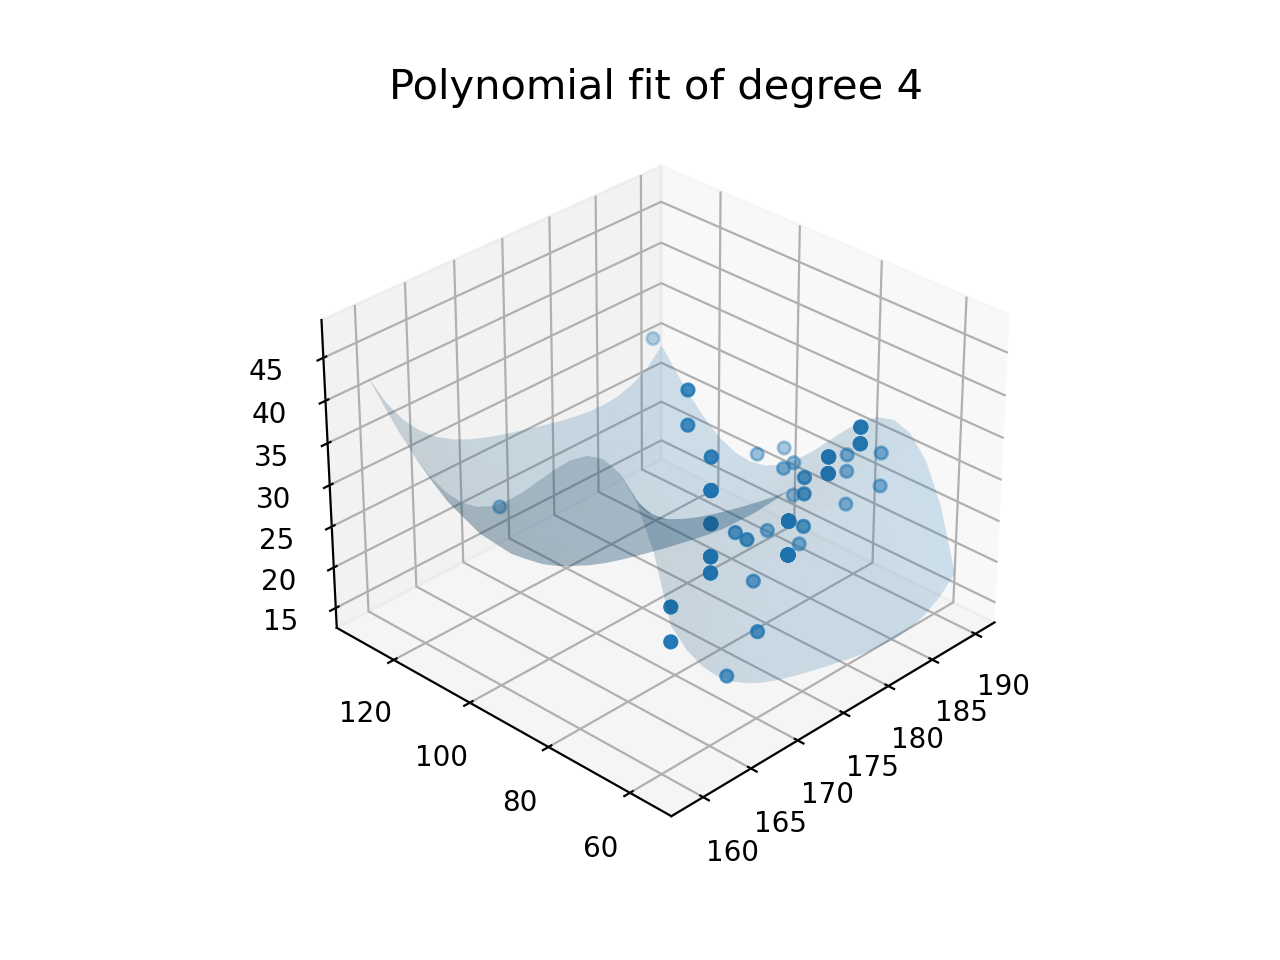

Text(0.5, 0.92, 'Polynomial fit of degree 4')

In [36]:
import warnings
warnings.filterwarnings("ignore")

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X_ax, Y_ax, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(X_dat[:,0], X_dat[:,1], y)
plt.title(f'Polynomial fit of degree {polynomial_degree}', fontsize=15)